<a href="https://githubtocolab.com/pinshuai/modvis/blob/master/examples/notebooks/model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Model evaluation

This example shows how to load model and observation data and evalute model performance. 

In [5]:
# # skip this if package has already been installed
# !pip install modvis

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os

from modvis import ATSutils
from modvis import utils
from modvis import general_plots as gp

import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s: %(message)s')

In [7]:
# run_steadystate = "1-spinup_steadystate"
work_dir = f"../../model2/"

rho_m = 55500 # moles/m^3, water molar density. Check this in the xml input file.

In [8]:
# model_dir = "../data/coalcreek"

Download the sample data when running on `Google Colab`

In [9]:
# import os
# if not os.path.exists(model_dir):
#   !git clone https://github.com/pinshuai/modvis.git
#   %cd ./modvis/examples/notebooks

## Load model data

This will load the `water_balance-daily.dat` file generated from ATS model. The data file includes watershed variables including outlet discharge, ET, and etc.

In [10]:
run_dir = "3-transient"
model_dir = os.path.join(work_dir, run_dir)
logging.info(f"Loading data from {model_dir}")

2025-04-25 15:20:10,229 - root - INFO: Loading data from ../../model2/3-transient


In [11]:
simu_df = ATSutils.load_waterBalance(model_dir, WB_filename="water_balance_computational_domain.csv",
                             domain_names = None,
                                canopy = True, plot = False
                               )

## Load observation data

Provide USGS gage number (i.e., `sites`) to download the streamflow. 

In [22]:
obs_df = utils.load_nwis(sites= "10172200", start = '2010-10-01', end = '2013-10-1')
obs_df

,Discharge [m^3/d]
datetime,
2010-10-01,3131.6224
2010-10-02,3082.6908
2010-10-03,3058.2250
2010-10-04,3253.9514
2010-10-05,3376.2804
...,...
2013-09-27,2250.8536
2013-09-28,2226.3878
2013-09-29,2079.5930


<AxesSubplot:xlabel='datetime'>

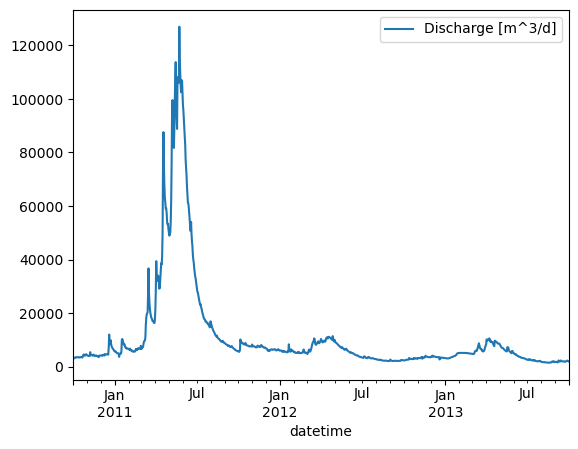

In [23]:
obs_df.plot()

## Streamflow comparison

Compare simulated streamflow with observed USGS streamflow.

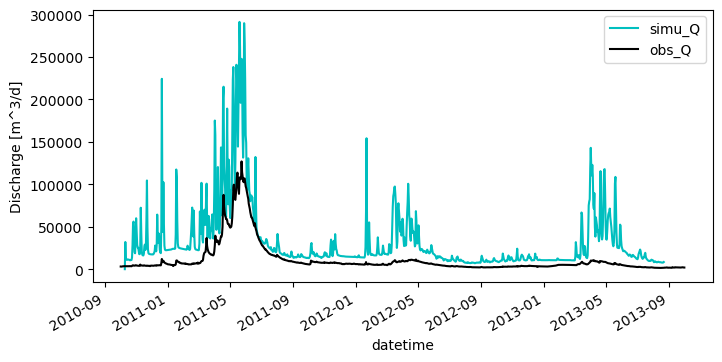

In [24]:
fig,ax = plt.subplots(1,1, figsize=(8,4))
simu_df['watershed boundary discharge [m^3/d]'].plot(color = 'c',ax=ax, label= "simu_Q")
obs_df['Discharge [m^3/d]'].plot(color = 'k', ax=ax, label = "obs_Q")
ax.set_ylabel("Discharge [m^3/d]")
ax.legend()

## Flow Duration Curve (FDC) comparison

The flow duration curve is a plot that shows the percentage of time that flow in a stream is likely to equal or exceed some specified value of interest (also called "exceedance probability). For example, it can be used to show the percentage of time river flow can be expected to exceed a design flow of some specified value (e.g., 20 cfs), or to show the discharge of the stream that occurs or is exceeded some percent of the time (e.g., 80% of the time). See [reference](https://streamflow.engr.oregonstate.edu/analysis/flow/index.htm) on how it's calculated.

In model validation, comparing observed and simulated FDCs shows how well a hydrological model reproduces the full range of flows (low, median, and high).

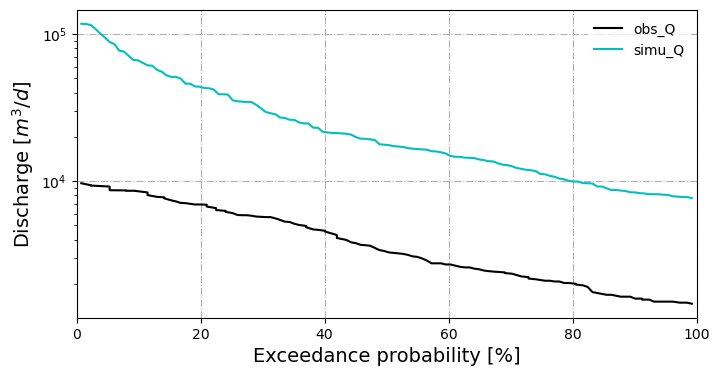

In [25]:
fig, ax = gp.plot_FDC(dfs=[obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]']],
           labels=['obs_Q','simu_Q'], 
           colors=['k', 'c'],
           start_date="2013-04-15" 
           )

## One-to-one plot

One to one scatter plot with metrics.

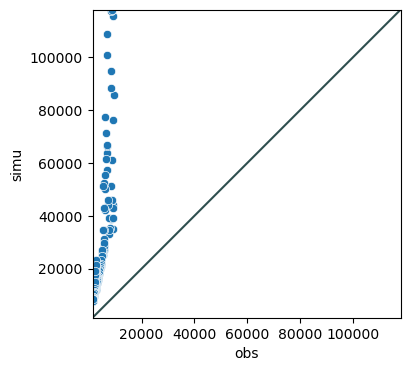

In [26]:
metrics = gp.one2one_plot(obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]'],
               # metrics=['R^2', 'NSE', 'mKGE'],
                metrics='all',
                show_metrics=False,
               show_density=False,
                start_date="2013-04-15"
               )

In [27]:
metrics

{'pearsonr': 0.8242182931115978,
 'R^2': 0.6793357946997957,
 'RMSE': 33890.773685579676,
 'rRMSE': 7.940034039103035,
 'NSE': -186.39856130576132,
 'logNSE': -8.278958763875595,
 'bias': -24350.328902298337,
 'pbias': 570.4869476906315,
 'KGE': -9.936281439297742,
 'npKGE': -4.7050139490825,
 'mKGE': -4.733110929487587}